# RNN Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/RSCCASN.csv')
data.head()

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558


In [3]:
data['DATE'] = pd.to_datetime(data.DATE)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     334 non-null    datetime64[ns]
 1   RSCCASN  334 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


In [4]:
data.DATE.describe()

count                     334
unique                    334
top       2009-09-01 00:00:00
freq                        1
first     1992-01-01 00:00:00
last      2019-10-01 00:00:00
Name: DATE, dtype: object

In [5]:
data.set_index('DATE', inplace=True)
data.index.name = None
data.head()

,RSCCASN
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [7]:
data.columns = ['Sales']

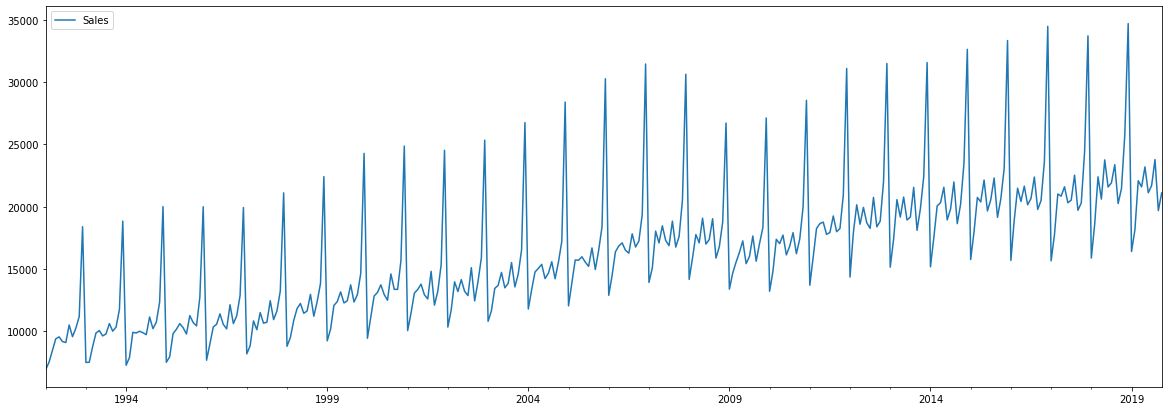

In [9]:
data.plot(figsize=(20, 7))

In [10]:
len(data)

334

In [11]:
# We are going to use 18 months a validation data
test_ind = len(data) - 18

train = data.iloc[:test_ind]
test = data.iloc[test_ind:]

print(f"Train shape {train.shape}")
print(f"Test shape {test.shape}")

Train shape (316, 1)
Test shape (18, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sc_train = scaler.fit_transform(train)
sc_test = scaler.transform(test)

# Create a model

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 12
generator = TimeseriesGenerator(sc_train, sc_train, length=length, batch_size=1)
validation = TimeseriesGenerator(sc_test, sc_test, length=length, batch_size=1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_features = 1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=20, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 10s 34ms/step - loss: 0.0237 - val_loss: 0.0918
Epoch 2/20
304/304 [==============================] - 8s 28ms/step - loss: 0.0198 - val_loss: 0.0144
Epoch 3/20
304/304 [==============================] - 8s 28ms/step - loss: 0.0124 - val_loss: 0.0011
Epoch 4/20
304/304 [==============================] - 8s 28ms/step - loss: 0.0053 - val_loss: 8.5991e-04
Epoch 5/20
304/304 [==============================] - 9s 30ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 6/20
304/304 [==============================] - 9s 29ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 7/20
304/304 [==============================] - 9s 28ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/20
304/304 [==============================] - 8s 28ms/step - loss: 0.0025 - val_loss: 0.0045
Epoch 9/20
304/304 [==============================] - 9s 29ms/step - loss: 0.0015 - val_loss: 8

# Evaluate on Test Data

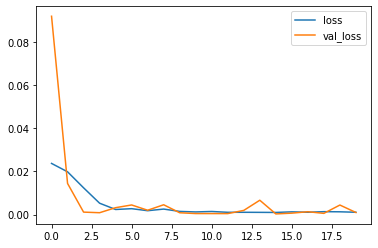

In [19]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
test_predictions = []

first_eval_batch = sc_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
test.head()

,Sales,Predictions
2018-05-01,23764,22043.968117
2018-06-01,21589,20955.576299
2018-07-01,21919,21075.200795
2018-08-01,23381,22830.842635
2018-09-01,20260,20279.391871


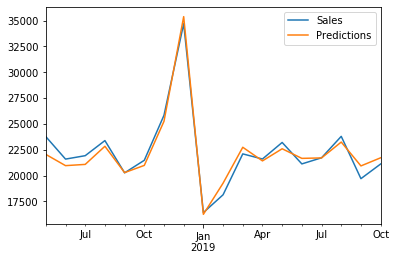

In [24]:
test.plot()

# Retrain and Forecasting

In [25]:
full_scaler = MinMaxScaler()
sc_data = full_scaler.fit_transform(data)

In [26]:
length = 12
generator = TimeseriesGenerator(sc_data, sc_data, length=length, batch_size=1)

In [27]:
n_features = 1

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(generator, epochs=10)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/10
322/322 [==============================] - 10s 32ms/step - loss: 0.0271
Epoch 2/10
322/322 [==============================] - 9s 27ms/step - loss: 0.0167
Epoch 3/10
322/322 [==============================] - 9s 27ms/step - loss: 0.0116
Epoch 4/10
322/322 [==============================] - 9s 28ms/step - loss: 0.0042
Epoch 5/10
322/322 [==============================] - 9s 28ms/step - loss: 0.0027
Epoch 6/10
322/322 [==============================] - 9s 29ms/step - loss: 0.0023
Epoch 7/10
322/322 [==============================] - 9s 28ms/step - loss: 0.0027
Epoch 8/10
322/322 [==============================] - 9s 28ms/step - loss: 0.0015
Epoch 9/10
322/322 [==============================] - 9s 29ms/step - loss: 0.0015
Epoch 10/10
322/322 [==============================] - 9s 29ms/step - loss: 0.0018


In [31]:
forecast = []
periods = 12

first_eval_batch = sc_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [32]:
forecast = full_scaler.inverse_transform(forecast)

In [35]:
data.tail()

,Sales
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [36]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods, freq='MS')
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, 
                           columns=['Forcast'])

In [37]:
forecast_df

,Forcast
2019-11-01,21853.398188
2019-12-01,20697.295529
2020-01-01,20924.502108
2020-02-01,22769.167656
2020-03-01,20227.445237
2020-04-01,20870.481241
2020-05-01,24805.768736
2020-06-01,34834.717265
2020-07-01,16528.564204
2020-08-01,18932.627671


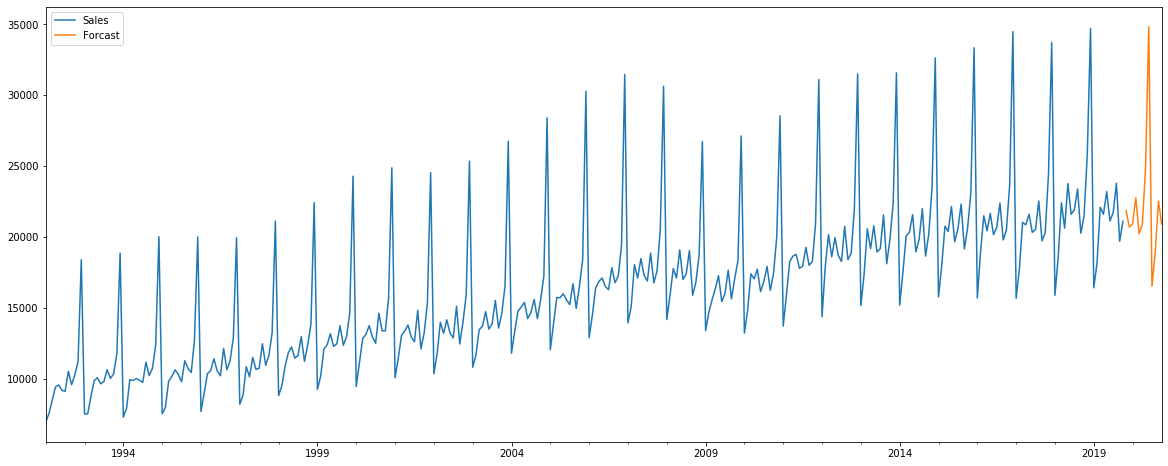

In [42]:
ax = data.plot(figsize=(20, 8))
forecast_df.plot(ax=ax)

(576, 611)

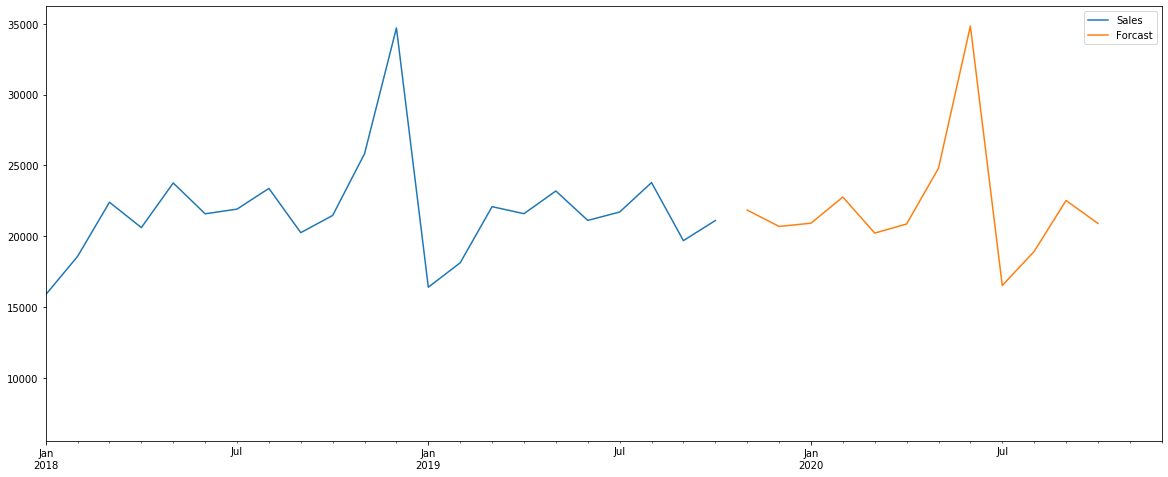

In [43]:
ax = data.plot(figsize=(20, 8))
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')